In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
city_data.head()


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [2]:
ride_data = pd.read_csv(ride_data_to_load)
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [3]:
# Combine the data into a single dataset
city_ride = pd.merge(city_data, ride_data, on='city')
city_ride.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
city_ride1 = city_ride.groupby(['city', 'type']).agg({'driver_count': 'mean', 'ride_id': 'nunique', 'fare': 'mean'}).reset_index()
city_ride1.head(10)

,city,type,driver_count,ride_id,fare
0,Amandaburgh,Urban,12,18,24.641667
1,Barajasview,Urban,26,22,25.332273
2,Barronchester,Suburban,11,16,36.422500
3,Bethanyland,Suburban,22,18,32.956111
4,Bradshawfurt,Rural,7,10,40.064000
5,Brandonfort,Suburban,10,19,35.437368
6,Carriemouth,Urban,52,27,28.314444
7,Christopherfurt,Urban,41,27,24.501852
8,Colemanland,Suburban,23,22,30.894545
9,Davidfurt,Suburban,23,17,31.995882


## Bubble Plot of Ride Sharing Data

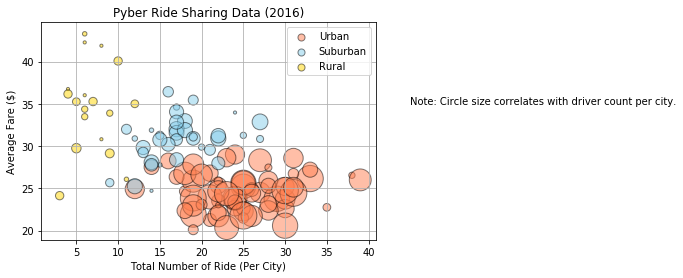

In [18]:
# Obtain the x and y coordinates for each of the three city types
# Build the scatter plots for each city types
# Incorporate the other graph properties
# Create a legend
# Incorporate a text label regarding circle size
# Save Figure

urban = city_ride1.loc[city_ride1["type"]== "Urban"]
suburban = city_ride1.loc[city_ride1["type"]== "Suburban"]
rural = city_ride1.loc[city_ride1["type"]== "Rural"]

plt.scatter(x=urban["ride_id"], y=urban["fare"], color = "Coral",
           s = urban["driver_count"]*10, label = "Urban", alpha=0.5, linewidth=1, edgecolor="black")

plt.scatter(x=suburban["ride_id"], y=suburban["fare"], color = "SkyBlue", 
           s = suburban["driver_count"]*10, label = "Suburban", alpha=0.5, linewidth=1, edgecolor="black")

plt.scatter(x=rural["ride_id"], y=rural["fare"], color = "Gold", 
           s = rural["driver_count"]*10, label = "Rural", alpha=0.5, linewidth=1, edgecolor="black")

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Ride (Per City)")
plt.ylabel("Average Fare ($)")
plt.text(45,35,"Note: Circle size correlates with driver count per city.")
plt.grid()
lgnd = plt.legend(loc="best")
for handle in lgnd.legendHandles:
    handle.set_sizes([50])

plt.show()                                                         

## Total Fares by City Type

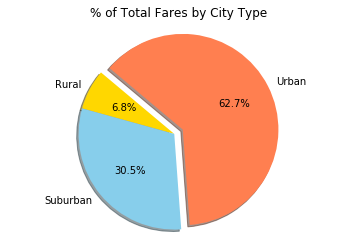

In [6]:
# Calculate Type Percents
# Build Pie Chart
# Save Figure

fare_total = city_ride['fare'].sum()
type_total = city_ride.groupby(['type']).agg({'fare': 'sum'})
type_percent = ((type_total/fare_total)*100).reset_index()

labels = type_percent['type']
sizes = type_percent['fare']
colors = ["Gold", "Skyblue", "Coral"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Fares by City Type")

plt.show()

## Total Rides by City Type

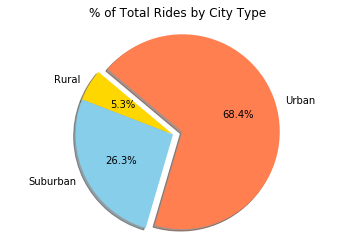

In [7]:
# Calculate Ride Percents
# Build Pie Chart
# Save Figure

ride_total = city_ride['ride_id'].nunique()
type_ride_total = city_ride.groupby(['type']).agg({'ride_id': 'nunique'})
type_ride_percent = ((type_ride_total/ride_total)*100).reset_index()

labels = type_ride_percent['type']
sizes = type_ride_percent['ride_id']
colors = ["Gold", "Skyblue", "Coral"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Rides by City Type")

plt.show()


## Total Drivers by City Type

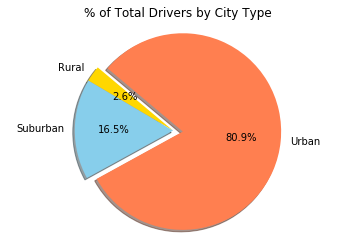

In [8]:
# Calculate Driver Percents
# Build Pie Charts
# Save Figure

driver_total = city_ride.groupby(['city']).agg({'driver_count': 'mean'}).reset_index()
driver_total1 = driver_total['driver_count'].sum()
type_driver_total = city_ride.groupby(['city','type']).agg({'driver_count': 'mean'}).reset_index()
del type_driver_total['city']
type_driver_total1 = type_driver_total.groupby(['type']).agg({'driver_count': 'sum'})
type_driver_percent = ((type_driver_total1/driver_total1)*100).reset_index()

type_driver_percent

labels = type_driver_percent['type']
sizes = type_driver_percent['driver_count']
colors = ["Gold", "Skyblue", "Coral"]
explode = (0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% of Total Drivers by City Type")

plt.show()